# WeatherPy

### Observations and Trends:

* There does not appear to be much correlation seen in the temperature vs. latitude relationship across all cities combined. However, this changes once we separate the data into hemispheres and observe the below.

* There is a strong correlation in the relationship between latitude and max temperature (F) in the northern and southern hemispheres. The northern hemisphere shows a strong negative correlation with temperatures decreasing as you move away from the equator (increasing latitude), while the southern hemisphere shows a strong positive correlation with temperatures increasing as you move towards the equator (increasing latitude).

* There is a trend of higher humidity levels in a majority of cities in the northern hemisphere at this time regardless of distance from the equator, as compared to cities in the southern hemisphere.<br>

In [22]:
# --- dependencies and setup ---
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# --- import API key ---
from config import weather_api_key

# --- incorporate citipy to determine city based on latitude and longitude ---
from citipy import citipy

# --- range of latitudes and longitudes ---
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [23]:
# --- list for holding lat_lngs and cities ---
lat_lngs = []
cities = []

# --- create a set of random lat and lng combinations ---
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# --- identify nearest city for each lat, lng combination ---
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# --- print the city count to confirm sufficient count ---
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# --- fahrenheit units ---
units = "imperial"

# --- build partial query url for API call for fahrenheit data ---
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# --- create empty lists to hold required data ---
city_name = []
city_lats = []
city_lngs = []
city_temp = []
city_maxtemps = []
city_humidity = []
city_cloudiness = []
city_windspeed = []
city_country = []
date = []

# --- initialize count variables for counting city and set ---
item = 1
batch = 1

# --- print initial header before displaying for loop  data ---
print("Beginning Data Retrieval")
print("----------------------------")

# --- for loop go through the list of cities and perform a request for data on each city ---
for city in cities:
    
    # --- build query url with city name ---
    query_url = base_url + city
    
    # --- get the response as json ---
    data = requests.get(query_url).json()
    
    # --- retrieve required data into lists using exception handling ---
    try:
        print(f"Processing Record {item} of Set {batch} | {city}")  
        city_name.append(data["name"])
        city_country.append(data["sys"]["country"])
        city_lats.append(data["coord"]["lat"])
        city_lngs.append(data["coord"]["lon"])    
        city_temp.append(data["main"]["temp"])
        city_maxtemps.append(data["main"]["temp_max"])
        city_humidity.append(data["main"]["humidity"])
        city_cloudiness.append(data["clouds"]["all"])
        city_windspeed.append(data["wind"]["speed"])
        date.append(data["dt"])
        
        # --- increase item count by 1 ---
        item += 1
        
        # --- if statement to limit API calls to 50 using time.sleep (openweathermap API limits calls to 60/minute) ---
        if item > 50:
            # --- start a new set of items ---
            batch += 1
            
            # --- reset item count to 1 for next set ---
            item = 1
            
            # --- delay the execution to stay within the limits of the API query ---
            time.sleep(1)
    
    except:
        print(f"City '{city}' not found. Skipping...")

# --- print completion header after displaying for loop  data ---
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 | clyde river
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | onega
Processing Record 8 of Set 1 | niquelandia
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | lata
Processing Record 11 of Set 1 | wote
Processing Record 12 of Set 1 | kamaishi
Processing Record 13 of Set 1 | turbat
Processing Record 14 of Set 1 | kovdor
Processing Record 15 of Set 1 | ukholovo
Processing Record 16 of Set 1 | vrangel
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | bosaso
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | yining
Processing Record 22 of Set 1 | samusu
City 'samusu' not found. Skipping...
Process

Processing Record 18 of Set 4 | udachnyy
Processing Record 19 of Set 4 | muros
Processing Record 20 of Set 4 | khormuj
City 'khormuj' not found. Skipping...
Processing Record 20 of Set 4 | beihai
Processing Record 21 of Set 4 | hvammstangi
City 'hvammstangi' not found. Skipping...
Processing Record 21 of Set 4 | kamakwie
Processing Record 22 of Set 4 | necochea
Processing Record 23 of Set 4 | altay
Processing Record 24 of Set 4 | arlit
Processing Record 25 of Set 4 | kodinsk
Processing Record 26 of Set 4 | juneau
Processing Record 27 of Set 4 | airai
Processing Record 28 of Set 4 | kaeo
Processing Record 29 of Set 4 | jamestown
Processing Record 30 of Set 4 | flinders
Processing Record 31 of Set 4 | estevan
Processing Record 32 of Set 4 | poplar bluff
Processing Record 33 of Set 4 | deputatskiy
Processing Record 34 of Set 4 | nioro
Processing Record 35 of Set 4 | vao
Processing Record 36 of Set 4 | grand river south east
City 'grand river south east' not found. Skipping...
Processing R

Processing Record 37 of Set 7 | matagami
Processing Record 38 of Set 7 | srednekolymsk
Processing Record 39 of Set 7 | plettenberg bay
Processing Record 40 of Set 7 | ca mau
Processing Record 41 of Set 7 | georgetown
Processing Record 42 of Set 7 | gongzhuling
Processing Record 43 of Set 7 | moses lake
Processing Record 44 of Set 7 | dingle
Processing Record 45 of Set 7 | artvin
Processing Record 46 of Set 7 | shu
Processing Record 47 of Set 7 | waddan
Processing Record 48 of Set 7 | hasaki
Processing Record 49 of Set 7 | manzil tamim
City 'manzil tamim' not found. Skipping...
Processing Record 49 of Set 7 | trincomalee
Processing Record 50 of Set 7 | porto santo
Processing Record 1 of Set 8 | iturama
Processing Record 2 of Set 8 | mahebourg
Processing Record 3 of Set 8 | beringovskiy
Processing Record 4 of Set 8 | kamenskoye
City 'kamenskoye' not found. Skipping...
Processing Record 4 of Set 8 | apricena
Processing Record 5 of Set 8 | bud
Processing Record 6 of Set 8 | san carlos
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
# --- create a dataframe with retrieved data ---
cities_temps_df = pd.DataFrame({"City": city_name,
                                "Country": city_country,
                                "Date": date,
                                "Lat": city_lats,
                                "Lng": city_lngs,
                                "Max Temp (F)": city_maxtemps,
                                "Humidity (%)": city_humidity,
                                "Cloudiness (%)": city_cloudiness,
                                "Wind Speed (mph)": city_windspeed,
                                })

# --- convert unix timestamp under date column to date,time using pd.to_datetime ---
cities_temps_df["Date"] = pd.to_datetime(cities_temps_df["Date"], unit = "s")

# --- save the dataframe to .csv file ---
cities_temps_df.to_csv("../output_data/cities.csv", index=True, index_label="City ID", header=True)

# --- display the dataframe ---
cities_temps_df


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# --- find cities that have humidity over 100% ---
humidity_over_100 = cities_temps_df.loc[cities_temps_df["Humidity (%)"] > 100, :]

if humidity_over_100.empty == True:
    print("There are no cities with humidity values over 100%")
    print("Using original dataframe to continue with plotting...")
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = cities_temps_df["Lat"]
    temperatures = cities_temps_df["Max Temp (F)"]
    humidity = cities_temps_df["Humidity (%)"]
    cloudiness = cities_temps_df["Cloudiness (%)"]
    windspeed = cities_temps_df["Wind Speed (mph)"]
    
else:
    # -- get the indices of cities that have humidity over 100% ---
    Humidityover100Index = humidity_over_100.index
    
    # --- create a clean DataFrame by dropping all humidity outliers by index found above ---
    clean_city_data = cities_temps_df.drop(Humidityover100Index).reset_index(drop=True)
    clean_city_data.head()
    
    # --- extract relevant fields from the data frame for plotting ---
    latitudes = clean_city_data["Lat"]
    temperatures = clean_city_data["Max Temp (F)"]
    humidity = clean_city_data["Humidity (%)"]
    cloudiness = clean_city_data["Cloudiness (%)"]
    windspeed = clean_city_data["Wind Speed (mph)"]

    # --- export the new dataframe into a csv ---
    clean_city_data.to_csv("../output_data/clean_city_data.csv", index=True, index_label="City ID", header=True)


There are no cities with humidity values over 100%
Using original dataframe to continue with plotting...


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

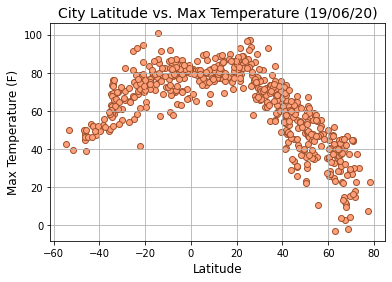

In [6]:
# --- create a scatter plot depicting latitude vs temperature ---

plt.scatter(latitudes, temperatures, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-temp.png")
plt.show()


### Temperature (F) vs. Latitude
The scatterplot for Temperature (F) vs. Latitude above shows that the temperatures tend to be higher near the equator (0 degrees latitude) at this time. 

## Latitude vs. Humidity Plot

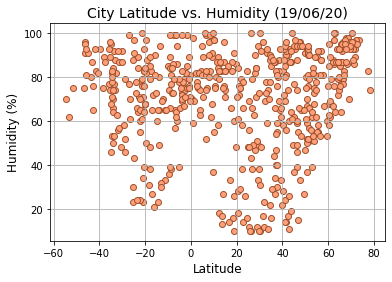

In [7]:
# --- create a scatter plot depicting latitude vs humidity ---
plt.scatter(latitudes, humidity, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-humidity.png")
plt.show()



### Humidity (%) vs. Latitude
The scatterplot for Humidity (%) vs. Latitude above does not appear to have much correlation. From the data points visualized, we can see that a large number of cities seem to have high humidity levels currently, with the majority being near the equator or in the northern hemisphere.

## Latitude vs. Cloudiness Plot

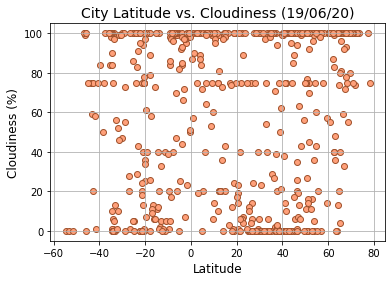

In [8]:
# --- create a scatter plot depicting latitude vs cloudiness ---
plt.scatter(latitudes, cloudiness, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness (19/06/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-cloudiness.png")
plt.show()



### Cloudiness (%) vs. Latitude
The scatterplot for Cloudiness (%) vs. Latitude above also does not appear to have much correlation, like humidity. 

## Latitude vs. Wind Speed Plot

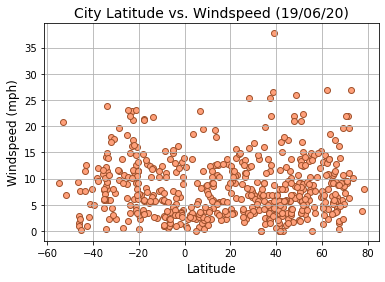

In [9]:
# --- create a scatter plot depicting latitude vs wind speed ---
plt.scatter(latitudes, windspeed, marker="o", facecolors="lightsalmon", edgecolors="sienna")

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Windspeed (19/06/20)", fontsize=14)
plt.ylabel("Windspeed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- display and save the plot ---
plt.savefig("../Images/latitude-vs-windspeed.png")
plt.show()


### Wind Speed (mph) vs. Latitude
The scatterplot for Wind Speed (mph) vs. Latitude again, does not show correlation, like humidity and cloudiness. It is observed that wind speeds are generally low at this time. 

## Linear Regression

In [10]:
#*******************************************************
# Create a function to create Linear Regression plots
#*******************************************************

def plot_linear_regression(x, y, ax=None, **kwargs):
    
    # --- use the axes specified ---
    ax = ax
    
    # --- get linear regression values and store in variables ---
    slope, intercept, rvalue, pvalue, stderror = linregress(x,y)
    print(f"Linear Regression Completed...")    
    print(f"The R Squared is: {rvalue**2}")

    # y = m * x + b
    regress_values = slope * x + intercept
    
    # --- create line equation ---
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
                                                          
    # --- plot the linear model ---
    ax.plot(x, regress_values, color="firebrick")
    
    # --- return the plot and line equation created ---
    return ax, line_eq



In [11]:
#*****************************************************
# Create Northern and Southern Hemisphere DataFrames
#*****************************************************

# --- find and store rows for Northern Hemisphere dataframe (greater than or equal to 0 degrees latitude) --- 
if humidity_over_100.empty == True:
    northern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] >= 0, :].copy().reset_index(drop=True)
else:
    northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0, :].copy().reset_index(drop=True)
    

# --- find and store rows for Southern Hemisphere dataframe (less than 0 degrees latitude) ---
if humidity_over_100.empty == True:
    southern_hemisphere = cities_temps_df.loc[cities_temps_df["Lat"] < 0, :].copy().reset_index(drop=True)
else:
    southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0, :].copy().reset_index(drop=True)    

# --- extract relevant fields from both data frames for plotting ---
north_latitudes = northern_hemisphere["Lat"]
north_temperatures = northern_hemisphere["Max Temp (F)"]
north_humidity = northern_hemisphere["Humidity (%)"]
north_cloudiness = northern_hemisphere["Cloudiness (%)"]
north_windspeed = northern_hemisphere["Wind Speed (mph)"]

south_latitudes = southern_hemisphere["Lat"]
south_temperatures = southern_hemisphere["Max Temp (F)"]
south_humidity = southern_hemisphere["Humidity (%)"]
south_cloudiness = southern_hemisphere["Cloudiness (%)"]
south_windspeed = southern_hemisphere["Wind Speed (mph)"]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.7302721366359707


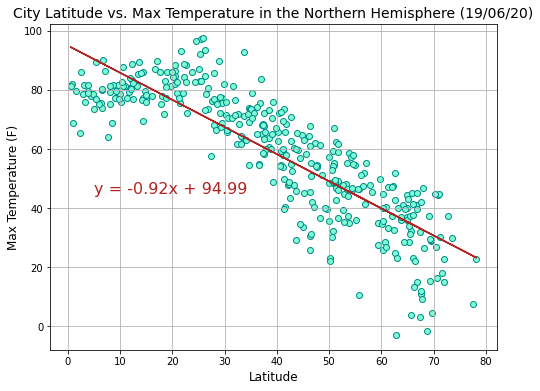

In [12]:
#**********************************************************************************
# Run linear regression on Northern Hemisphere - Temperature (F) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_temperatures, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,45),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-temp-linreg.png")
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.5047443856037368


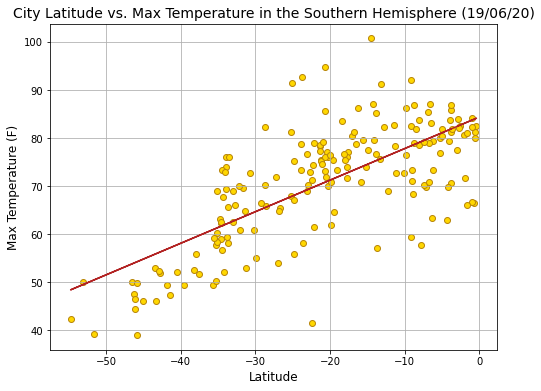

In [13]:
#**********************************************************************************
# Run linear regression on Southern Hemisphere - Temperature (F) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_temperatures, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_temperatures, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Max Temperature in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Max Temperature (F)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-25, 35),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-temp-linreg.png")
plt.show()



### Northern/Southern Hemispheres - Temperature (F) vs. Latitude Linear Regression
Both scatter plots show a strong correlation between max temperature (F) and latitude, with the northern hemisphere displaying a negative correlation and the southern hemisphere being positive.

Looking at this pair of plots, it is apparent that temperatures are higher as you near the equator (0 degrees latitude). In the northern hemisphere, we see temperature falling as latitude increases, and in the southern hemisphere, temperatures increase while latitude increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.04332600534853997


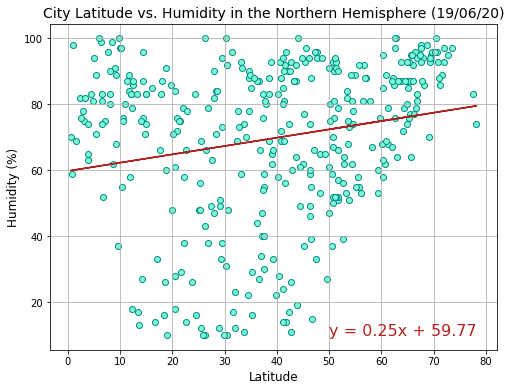

In [14]:
#**********************************************************************************
# Run linear regression on Northern Hemisphere - Humidity (%) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_humidity, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(50,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-humidity-linreg.png")
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.008193191769843275


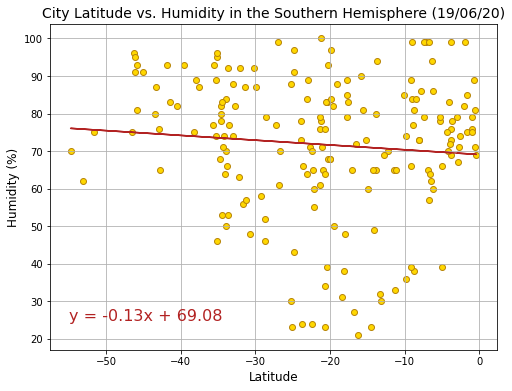

In [15]:
#**********************************************************************************
# Run linear regression on Southern Hemisphere - Humidity (%) vs. Latitude
#**********************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_humidity, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_humidity, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Humidity in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-humidity-linreg.png")
plt.show()



### Northern/Southern Hemispheres - Humidity (%) vs. Latitude Linear Regression
There does not appear to be any correlation between humidity and latitude in both the northern and southern hemispheres.

Considering it is summer time, the cities in the northern hemisphere seem to be displaying a general trend of higher humidity levels regardless of distance from the equator.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.025222926855323593


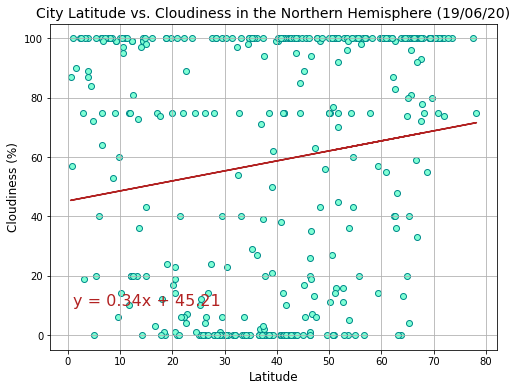

In [16]:
#************************************************************************************
# Run linear regression on Northern Hemisphere - Cloudiness (%) vs. Latitude 
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_cloudiness, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(1,10),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-cloudiness-linreg.png")
plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.01618180050210923


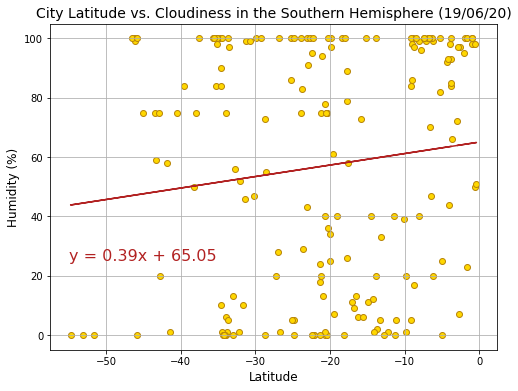

In [17]:
#************************************************************************************
# Run linear regression on Southern Hemisphere - Cloudiness (%) vs. Latitude
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_cloudiness, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_cloudiness, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Cloudiness in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 25),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-cloudiness-linreg.png")
plt.show()



### Northern/Southern Hemispheres - Cloudiness (%) vs. Latitude Linear Regression
There does not appear to be any correlation between cloud cover and latitude in both the northern and southern hemispheres.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.02051159981657034


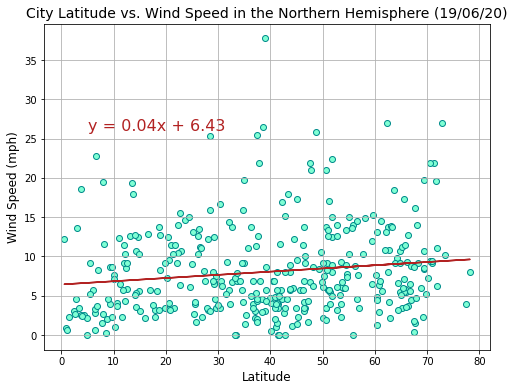

In [18]:
#************************************************************************************
# Run linear regression on Northern Hemisphere - Wind Speed (mph) vs. Latitude
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(north_latitudes, north_windspeed, marker="o", facecolors="aquamarine", edgecolors="darkcyan")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(north_latitudes, north_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Northern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(5,26),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/northern-latitude-vs-windspeed-linreg.png")
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Linear Regression Completed...
The R Squared is: 0.017410796036760746


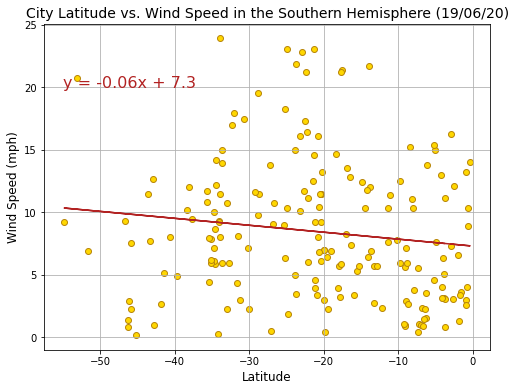

In [19]:
#************************************************************************************
# Run linear regression on Southern Hemisphere - Wind Speed (mph) vs. Latitude 
#************************************************************************************

# --- create scatter plot ---
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(south_latitudes, south_windspeed, marker="o", facecolors="gold", edgecolors="darkgoldenrod")

# --- call linear regression plot function to retrieve plot and line equation (for annotation) ---
ax, line_eq = plot_linear_regression(south_latitudes, south_windspeed, ax)

# --- add labels, title, limits & grid ---
plt.title("City Latitude vs. Wind Speed in the Southern Hemisphere (19/06/20)", fontsize=14)
plt.ylabel("Wind Speed (mph)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.grid()

# --- annotate the linear regression line equation on the plot ---
plt.annotate(line_eq,(-55, 20),fontsize=16,color="firebrick")

# --- display and save the plot ---
plt.savefig("../Images/southern-latitude-vs-windspeed-linreg.png")
plt.show()



### Northern/Southern Hemispheres - Wind Speed mph vs. Latitude Linear Regression
There does not appear to be any correlation between wind speed and latitude in both the northern and southern hemispheres.

